In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import names

In [2]:
rng = np.random.default_rng(seed = 1)

In [3]:
person = []
for i in range (1,100001):
    person.append ("ID {}".format(i))
#person

In [4]:
df = pd.DataFrame(index=None)
df["Person"] = person

In [5]:
age = []
for i in range(100000):
    a = np.clip(np.random.normal(50, 15), 15, 100)
    age.append(int(a))

In [6]:
df["Age"] = age

In [7]:
gender_choice = ["Male", "Female"]
gender = rng.choice (gender_choice, p = [0.79, 0.21], size = 100000)

In [8]:
df["Gender"] = gender

In [9]:
def applyFunc(s):
    if s == "Male":
        m = rng.normal(179, 10)
        return round(m, 1)
    elif s == "Female":
        f = rng.normal(164, 10)
        return round(f, 1)
    
df["Height"] = df["Gender"].apply(applyFunc)

In [10]:
def applyFunc(s):
    if s == "Male":
        m = np.clip(np.random.normal(89.2, 7 ), 30, 200)
        return round(m, 1)
    elif s == "Female":
        f = np.clip(np.random.normal(73.1, 7 ), 30, 200)
        return round(f, 1)
df["Weight"] = df["Gender"].apply(applyFunc)

In [11]:
df["BMI"] = (df["Weight"] / ((df["Height"])/100)**2).round(1)

In [12]:
def applyFunc(s):
    if s == "Male":
        m = rng.gamma(38.57,0.98)
        return round(m, 1)
    elif s == "Female":
        f = rng.gamma(15.55,0.91)
        return round(f, 1)
df["Alcohol consumption"] = df["Gender"].apply(applyFunc)

In [13]:
def applyFunc(s):
    if s <18.5:
        return "Underweight"
    elif s >=18.5 and s <25:
        return "Healthy weight"
    elif s >=25 and s <30:
        return "Overweight"
    elif s >=30 and s <40:
        return "Overweight"
    elif s >=25:
        return "Obese"
df["BMI Classification"] = df["BMI"].apply(applyFunc)

In [14]:
df

,Person,Age,Gender,Height,Weight,BMI,Alcohol consumption,BMI Classification
0,ID 1,53,Male,166.8,79.3,28.5,32.4,Overweight
1,ID 2,54,Female,170.2,69.6,24.0,16.0,Healthy weight
2,ID 3,36,Male,186.2,96.7,27.9,40.5,Overweight
3,ID 4,70,Female,180.8,79.5,24.3,16.4,Healthy weight
4,ID 5,23,Male,162.3,86.7,32.9,43.1,Overweight
...,...,...,...,...,...,...,...,...
99995,ID 99996,42,Male,150.2,99.2,44.0,41.1,Obese
99996,ID 99997,16,Male,175.2,90.4,29.5,53.1,Overweight
99997,ID 99998,68,Male,147.2,93.0,42.9,32.9,Obese
99998,ID 99999,24,Male,151.3,93.4,40.8,42.1,Obese


alcohol consumption g per day

In [15]:
df.describe()

,Age,Height,Weight,BMI,Alcohol consumption
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49.501290,175.840289,85.829671,27.983249,32.803156
std,14.922393,11.713063,9.568379,4.004344,11.172768
min,15.000000,125.100000,44.700000,13.700000,4.300000
25%,39.000000,168.200000,80.000000,25.200000,28.400000
50%,49.000000,176.400000,86.900000,27.700000,35.400000
75%,60.000000,183.900000,92.600000,30.400000,40.400000
max,100.000000,220.200000,117.400000,50.200000,70.100000


In [16]:
df["BMI Classification"].value_counts()

Overweight        76701
Healthy weight    22448
Obese               621
Underweight         230
Name: BMI Classification, dtype: int64

In [17]:
df.corr()

,Age,Height,Weight,BMI,Alcohol consumption
Age,1.000000,0.004261,0.002411,-0.002073,-0.001031
Height,0.004261,1.000000,0.353520,-0.657532,0.447184
Weight,0.002411,0.353520,1.000000,0.461360,0.589963
BMI,-0.002073,-0.657532,0.461360,1.000000,0.054581
Alcohol consumption,-0.001031,0.447184,0.589963,0.054581,1.000000


In [18]:
fmean = [179, 89.2]
fcov = np.array([[1, 0.7], 
                [0.7, 1]]) 

data = np.random.multivariate_normal(fmean, fcov, 100)
data = pd.DataFrame(data)
data.columns = ['Height','Weight']
data

,Height,Weight
0,177.779427,89.030297
1,178.257526,89.431240
2,180.486450,91.718545
3,178.653549,88.683132
4,180.814163,91.688742
...,...,...
95,178.705287,88.544101
96,178.769774,88.838695
97,179.408441,89.316389
98,178.782605,88.613751


<AxesSubplot:xlabel='Height', ylabel='Weight'>

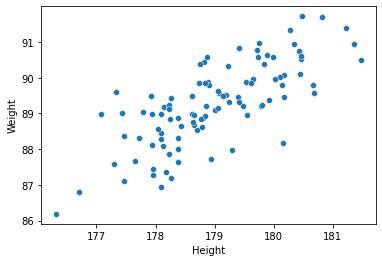

In [19]:
sns.scatterplot (x = data["Height"], y = data["Weight"])

In [21]:
# Defining a function.
def applyFunc(s):
    if s == "Male": # If male.
        # Create an array of height and weight.
        m_means = [179, 89.2, 37.5] # mean for height and weight.
        m_stds = [5, 12, 6.3] #standard deviation
        m_corr = 0.6 # correlation
        m_ncorr = 0.1
        m_covs = [[m_stds[0]**2,  m_stds[0]*m_stds[1]*m_corr, m_stds[0]*m_stds[2]*m_ncorr], 
                [m_stds[0]*m_stds[1]*m_corr, m_stds[1]**2 , m_stds[1]*m_stds[2]*m_corr],
                [m_stds[0]*m_stds[2]*m_ncorr, m_stds[1]*m_stds[2]*m_ncorr, m_stds[2]**2]]
        m_data = rng.multivariate_normal(m_means, m_covs)       
        m_data = m_data.round(1)
        return m_data[0], m_data[1], m_data[2]
    if s == "Female": # If female.
         # Create an array of height and weight.
        f_means = [164, 73.1, 15.55] # mean for height and weight.
        f_stds = [5, 12, 6.3] #standard deviation
        f_corr = 0.5 # correlation
        f_ncorr = 0.1
        f_covs = [[f_stds[0]**2,  f_stds[0]*f_stds[1]*f_corr, f_stds[0]*f_stds[2]*f_ncorr], 
                [f_stds[0]*f_stds[1]*f_corr, f_stds[1]**2 , f_stds[1]*f_stds[2]*f_corr],
                [f_stds[0]*f_stds[2]*f_ncorr, f_stds[1]*f_stds[2]*f_ncorr, f_stds[2]**2]]  
        f_data = rng.multivariate_normal(f_means, f_covs)       
        f_data = f_data.round(1)
        return f_data[0], f_data[1], f_data[2]

# Create an array based on gender
height_weight = df["gender"].apply(applyFunc)
# Assign array elements [3]
df["height"]= height_weight.str[0]
df["weight"]= height_weight.str[1]
df["alcohol_consumption"] = height_weight.str[2]
# Current dataset
df.head()

SyntaxError: invalid syntax (<ipython-input-21-3f018b926de8>, line 12)

<AxesSubplot:ylabel='Density'>

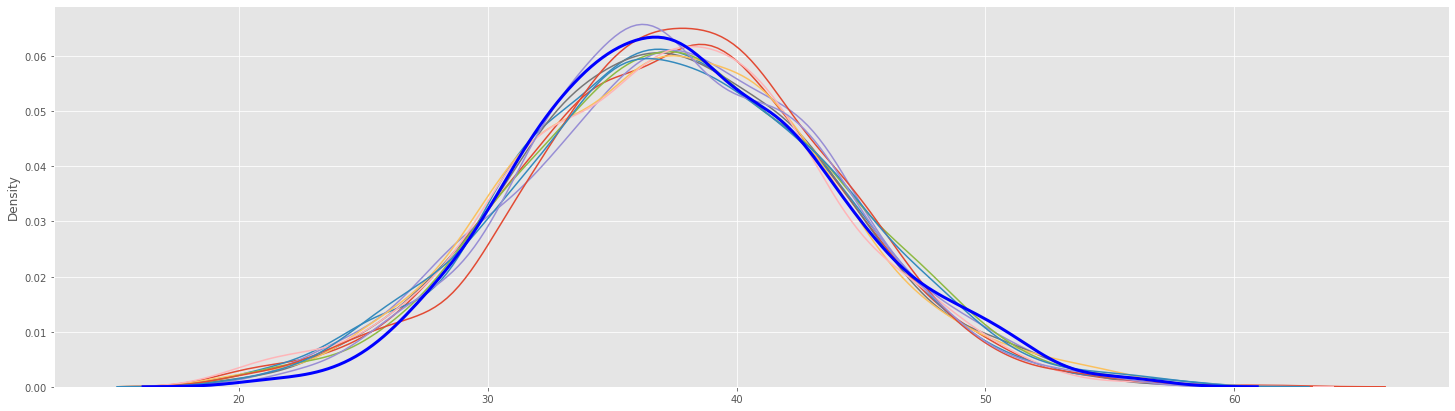

In [46]:
for seed in range (10):
    rng = np.random.default_rng(seed)

    n = []
    for i in range(1000):
        a = np.clip(np.random.normal(37.5, 6.3), 20, 100)
        n.append((a))
    sns.kdeplot(n, alpha = 0.7)
m = rng.gamma(38.57,0.98, 1000)
sns.kdeplot (m, linewidth = 3, color = "b")
